In [1]:
import sys
import os
from importlib import reload
import pylab as plt
import skimage
import numpy as np
from skimage import exposure

sys.path.insert(0, '../../src')
import deepgeo.dataset.image_utils as iutils
import deepgeo.common.geofunctions as gf
import deepgeo.common.visualization as vis

reload(iutils)
reload(gf)
reload(vis)

<module 'deepgeo.common.visualization' from '../../src/deepgeo/common/visualization.py'>

In [2]:
DATA_DIR = "/home/raian/doutorado/Dados/generated"

shp_ref = os.path.join(DATA_DIR, "Prodes_mosaic.shp")

input_files = {"2013": [os.path.join(DATA_DIR, "LC08_L1TP_224063_03082013.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225064_26082013.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_10082013.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_03082013.tif")],
               "2014": [os.path.join(DATA_DIR, "LC08_L1TP_224063_05072014.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_05072014.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_28072014.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225064_13082014.tif")],
               "2015": [os.path.join(DATA_DIR, "LC08_L1TP_224063_10092015.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_24072015.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_15072015.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225064_16082015.tif")],
               "2016": [os.path.join(DATA_DIR, "LC08_L1TP_225064_17072016.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_26072016.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_17072016.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224063_20072016.tif")],
               "2017": [os.path.join(DATA_DIR, "LC08_L1TP_225064_20072017.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_29072017.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_20072017.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224063_29072017.tif")],
               "2018": [os.path.join(DATA_DIR, "LC08_L1TP_225064_23072018.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_16072018.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_23072018.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224063_16072018.tif")]}

band_names = ['pixel_qa', 'Green', 'Red', 'NIR', 'SWIR_1', 'SWIR_2']

output_files = {"2013": os.path.join(DATA_DIR, "mosaic_2013.tif"),
                "2014": os.path.join(DATA_DIR, "mosaic_2014.tif"),
                "2015": os.path.join(DATA_DIR, "mosaic_2015.tif"),
                "2016": os.path.join(DATA_DIR, "mosaic_2016.tif"),
                "2017": os.path.join(DATA_DIR, "mosaic_2017.tif"),
                "2018": os.path.join(DATA_DIR, "mosaic_2018.tif")}

temp_file = os.path.join(DATA_DIR, "mosaic_.tif")

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_05072014.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_05072014.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_28072014.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_13082014.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_05072014.tif
File Size: 6706x6169x6
Pixel Size: 0.000269 x -0.000269
UL:(-50.971028,-3.506315)   LR:(-49.163761,-5.168861)
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_05072014.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-5

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


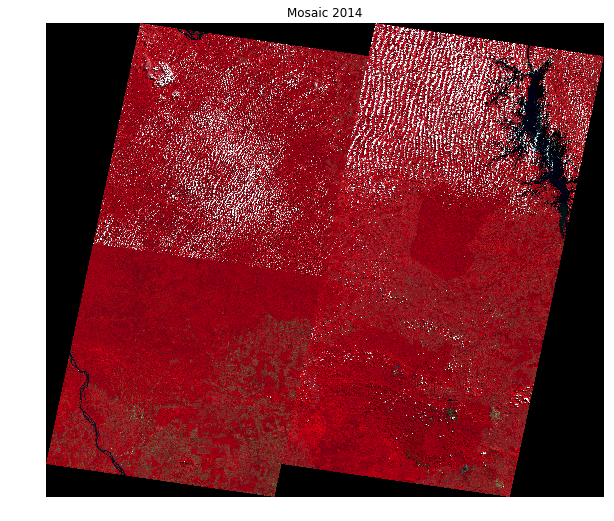

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_20072017.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_29072017.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_20072017.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_29072017.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_20072017.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-52.825315,-4.952221)   LR:(-51.017239,-6.614497)
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_29072017.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-5

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


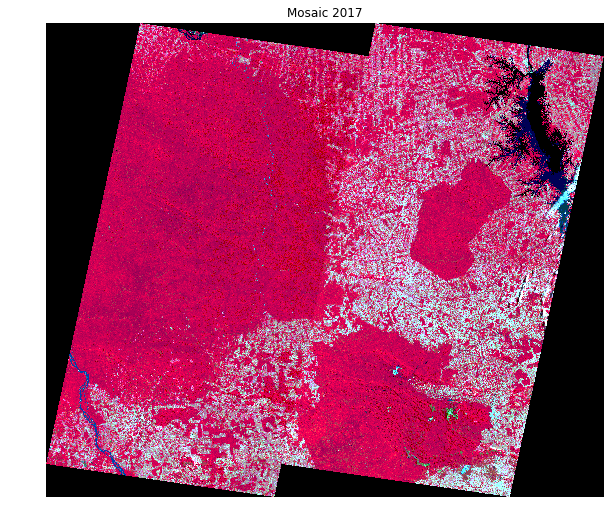

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_17072016.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_26072016.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_17072016.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_20072016.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_17072016.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-52.825390,-4.952190)   LR:(-51.017314,-6.614466)
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_26072016.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-5

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


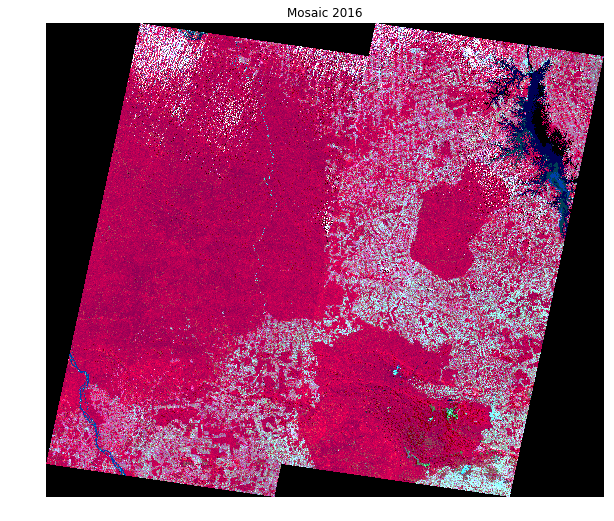

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_23072018.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_16072018.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_23072018.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_16072018.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_23072018.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-52.825296,-4.952228)   LR:(-51.017221,-6.614504)
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.
Copy 0,0,6709,6168 to 0,5365,6709,6169.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_16072018.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-5

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


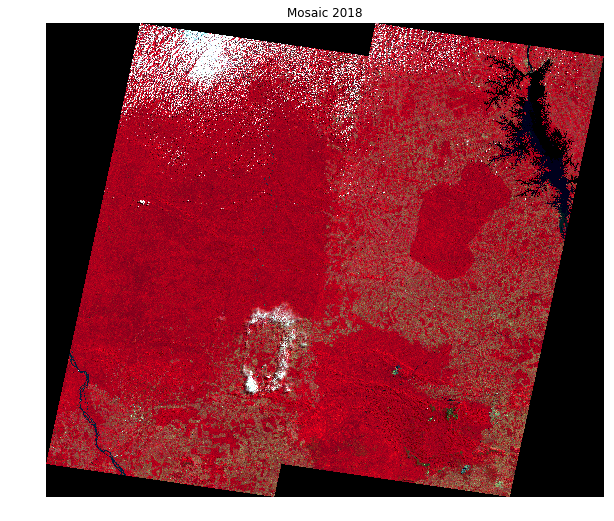

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_10092015.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_24072015.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_15072015.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_16082015.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_10092015.tif
File Size: 6706x6169x6
Pixel Size: 0.000269 x -0.000269
UL:(-50.971015,-3.506310)   LR:(-49.163748,-5.168855)
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.
Copy 0,0,6706,6169 to 6880,0,6707,6170.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_24072015.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-5

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


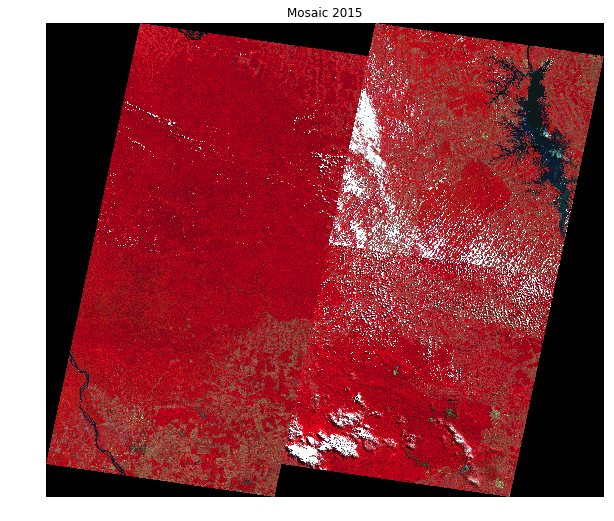

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_03082013.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_26082013.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_10082013.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_03082013.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_03082013.tif
File Size: 6706x6169x6
Pixel Size: 0.000269 x -0.000269
UL:(-50.971041,-3.506315)   LR:(-49.163774,-5.168861)
Copy 0,0,6706,6169 to 6881,0,6706,6170.
Copy 0,0,6706,6169 to 6881,0,6706,6170.
Copy 0,0,6706,6169 to 6881,0,6706,6170.
Copy 0,0,6706,6169 to 6881,0,6706,6170.
Copy 0,0,6706,6169 to 6881,0,6706,6170.
Copy 0,0,6706,6169 to 6881,0,6706,6170.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_26082013.tif
File Size: 6709x6168x6
Pixel Size: 0.000269 x -0.000269
UL:(-5

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


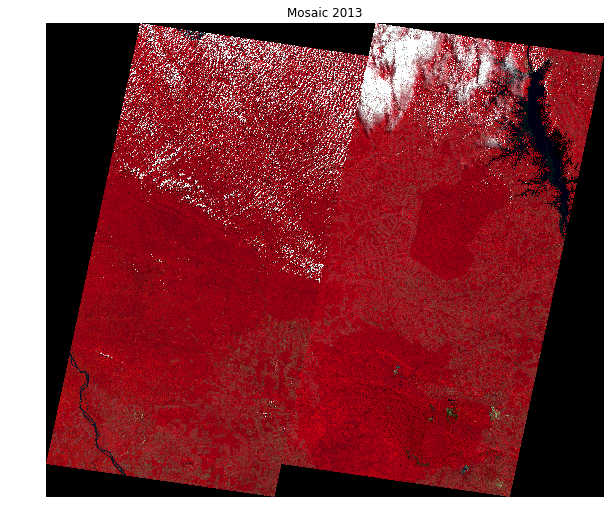

In [3]:
for year, scenes in input_files.items():
    iutils.mosaic_images(scenes, output_files[year], band_names)
    rarr = gf.load_image(output_files[year], no_data=-9999)
    title = str("Mosaic ") + year
    vis.plot_rgb_img(rarr, bands=[3,2,1], contrast=True, title=title)